<a href="https://colab.research.google.com/github/MuhAdeRizki/TugasDLTM4/blob/master/DLTM4202155202027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,models,layers

In [2]:
data = tf.keras.datasets.cifar10
# The CIFAR10 dataset contains 60,000 color images in 10 classes,
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
print(train_labels[0])

[6]


In [7]:
print(train_images[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


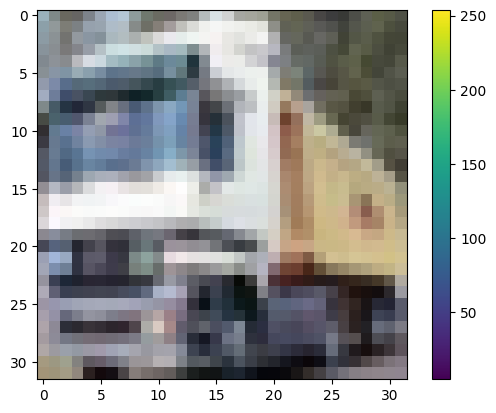

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

plt.show()

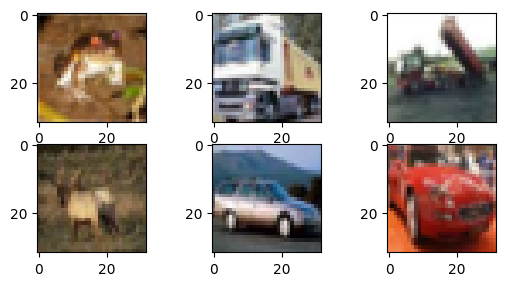

In [9]:
for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i])
plt.show()

In [10]:
#Normalize

train_images, test_images = train_images / 255.0, test_images / 255.0

In [11]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

def train_dataloader(self):
    if self.trainer.current_epoch > 50:
        batch_size = 32
    else:
        batch_size =64

    return DataLoader(..., batch_size=batch_size)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5044 - accuracy: 0.4509 - val_loss: 1.3045 - val_accuracy: 0.5285
Epoch 2/50
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1458 - accuracy: 0.5940 - val_loss: 1.0877 - val_accuracy: 0.6146
Epoch 3/50
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9860 - accuracy: 0.6524 - val_loss: 0.9883 - val_accuracy: 0.6520
Epoch 4/50
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8863 - accuracy: 0.6865 - val_loss: 0.9492 - val_accuracy: 0.6690
Epoch 5/50
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8054 - accuracy: 0.7153 - val_loss: 0.8900 - val_accuracy: 0.6894
Epoch 6/50
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7377 - accuracy: 0.7398 - val_loss: 0.8994 - val_accuracy: 0.6846
Epoch 7/50
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6823 - accuracy: 0.7614 - val_loss: 0.8694 -

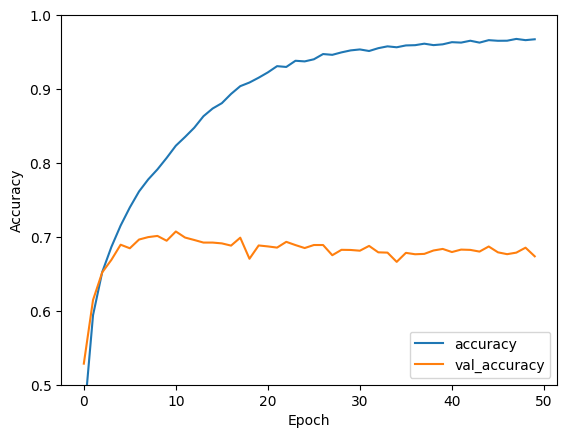

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [15]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

def train_dataloader(self):
    if self.trainer.current_epoch > 50:
        batch_size = 32
    else:
        batch_size =64

    return DataLoader(..., batch_size=batch_size)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4982 - accuracy: 0.4542 - val_loss: 1.2220 - val_accuracy: 0.5566
Epoch 2/100
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1190 - accuracy: 0.6038 - val_loss: 1.0575 - val_accuracy: 0.6266
Epoch 3/100
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9640 - accuracy: 0.6599 - val_loss: 1.0307 - val_accuracy: 0.6455
Epoch 4/100
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8640 - accuracy: 0.6974 - val_loss: 0.9352 - val_accuracy: 0.6819
Epoch 5/100
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7880 - accuracy: 0.7229 - val_loss: 0.9282 - val_accuracy: 0.6830
Epoch 6/100
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7232 - accuracy: 0.7456 - val_loss: 0.9532 - val_accuracy: 0.6767
Epoch 7/100
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6621 - accuracy: 0.7661 - val_loss: 0

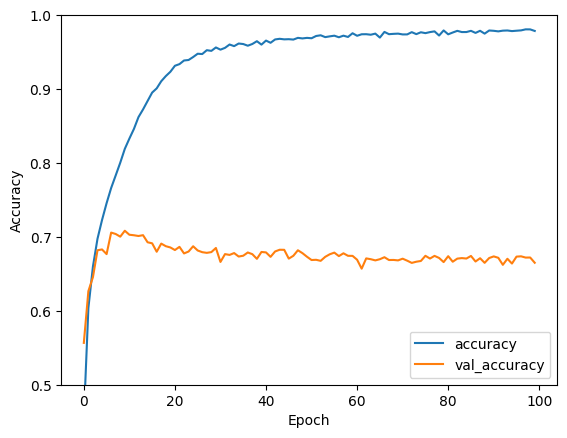

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')